<a href="https://colab.research.google.com/github/Dikiwp30/Studi-Independen/blob/main/Diki_Wahyu_P_simple_data_pre_processing_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Pre-processing Stage

 
  Pada notebook ini berisi tentang basic dalam data pre-processing


#### Why preprocessing ?
1. Data yang kita punya dalam dunia nyata biasanya:
    * Incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data.
    * Noisy: mengandung error seperti missing values dan outliers.
    * Inconsistent: mengandung perbedaan dalam penulisan kolom.

Mari kita pakai sebuah dataset sederhana untuk latihan.
Dataset "data.csv" mengandung informasi dimana apakah user akan membeli sebuah product atau tidak.
User mempunya fitur age,salary, dan negara tempat mereka tinggal.

## 1. Import library

Pada percobaan kali ini kita hanya membutuhkan 2 library yaitu pandas dan numpy. Pandas berguna untuk mengimport datasetnya sedangkan numpy akan kita gunakan dalam mempreproses datanya.

In [1]:
import numpy as np
import pandas as pd

## 2 Import dataset

In [2]:
dataset = pd.read_csv("Data.csv")


# Menampilkan shape dari data yg kita punya
print('dataset:', (str(dataset.shape)))


dataset: (15, 4)


Dataset kita mengandung 15 rows dan 4 columns.
Itu artinya kita mempunyai 15 data dan 4 Kolom

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    15 non-null     object 
 1   Age        14 non-null     float64
 2   Salary     14 non-null     float64
 3   Purchased  15 non-null     object 
dtypes: float64(2), object(2)
memory usage: 608.0+ bytes


In [6]:
dataset.duplicated().sum()

0

In [7]:
# print the dataset
dataset

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


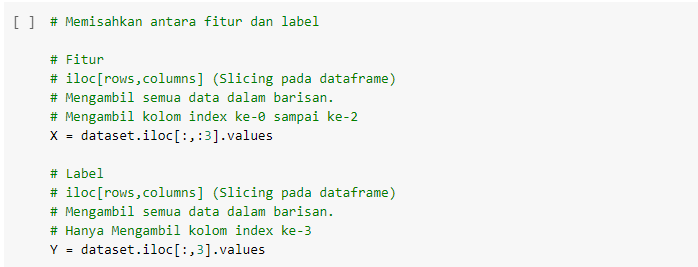

In [8]:
X = dataset.iloc[:,:3].values

Y = dataset.iloc[:,3].values

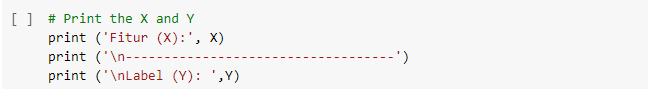

In [16]:
print ('Fitur (X):',X)
print ('\n..........................')
print ('\nLabel (Y): ',Y)

Fitur (X): [['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 nan]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' nan 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]

..........................

Label (Y):  ['Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No']


## 3. Handle Missing Data


In [17]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

Dengan menggunakan fungsi isnull().sum() kita dapat melihat jumlah data yg memiliki missing value dari tiap kolom yang ada.
Disini kita dapat melihat kalau terdapat 2 kolom yang memiliki masalah missing value, yaitu pada kolom 'Age' dan 'Salary'.

Untuk menangangi masalah missing value, kita bisa melakukan 2 hal. Pertama kita bisa menghapus datanya atau kita bisa mengisi nilai yang kosong itu menggunakan nilai mean/modus/median.

Pada percobaan kali ini kita akan menggunakan nilai Mean untuk mengisi missing value tersebut menggunakan bantuan Simple Imputer dari module sklearn

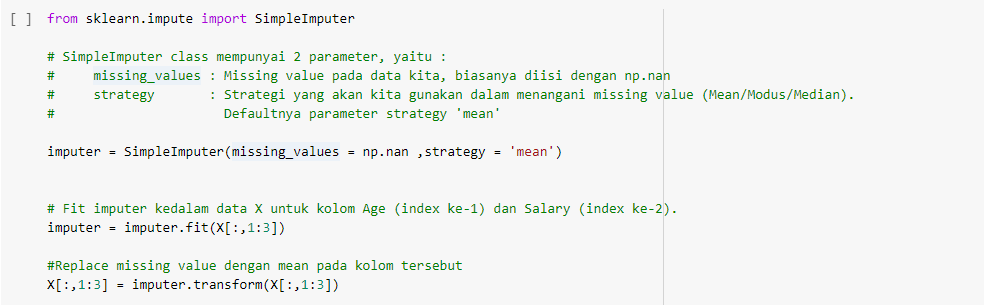

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan ,strategy = 'mean')
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])


Dibawah ini kita bisa melihat bahwa tidak ada nilai 'Nan' pada data X

In [19]:
print ('X: ', X)

X:  [['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 54857.142857142855]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' 33.714285714285715 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]


* Mean Value of Age    = Sum of all age values /14   = 33.714285714285715
* Mean Value of Salary = Sum of all Salary value /14 = 54857.142857142855

## 3. Encode the Categorical data

Categorical data biasanya biasanya memiliki tipe data string.
Beberapa algoritma dapat memproses categorical data yg berbentuka string secara langsung seperti decision tree.

Akan tetapi banyak machine learning algorithms tidak dapat memproses categorical data yg berbentuk string secara langsung. Mereka membutuhkan variabel yg berbentuk numeric.

Itu artinya categorical data harus dikonversi bentukanya kedalam numerical form.

Pada Dataset kita terdapat dua kolom categorical data

Yaitu kolom 'Country' dan 'Purchased'

#### Label Encoder: 

    * Metode ini bisa digunakan untuk mentranform non-numerical labels kedalam bentuk numerical labels (or nominal
      categorical variables).
    * Numerical labels akan selalu ada diantara 0 sampai n_classes-1. 
      Misalkan ada 3 kelas, berarti labelnya ada di 0, 1, dan 2.

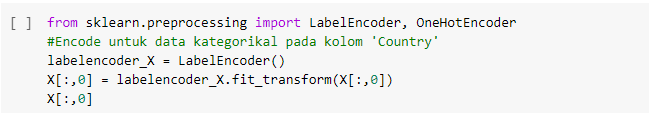

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,0]


array([1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2], dtype=object)

Sekarang categorical value untuk kolom 'Country' dirbah ke dalam bentuk kategorikal

| Country | Value |
|:--------|:------|
| China   |   0   |  
| India   |   1   |   
| Srilanka|   2   |   


In [21]:
X

array([[1, 34.0, 92000.0],
       [2, 22.0, 25000.0],
       [0, 31.0, 74000.0],
       [2, 29.0, 54857.142857142855],
       [0, 55.0, 98000.0],
       [1, 24.0, 30000.0],
       [2, 28.0, 40000.0],
       [1, 33.714285714285715, 60000.0],
       [0, 51.0, 89000.0],
       [1, 44.0, 78000.0],
       [2, 21.0, 20000.0],
       [0, 25.0, 30000.0],
       [1, 33.0, 45000.0],
       [1, 42.0, 65000.0],
       [2, 33.0, 22000.0]], dtype=object)

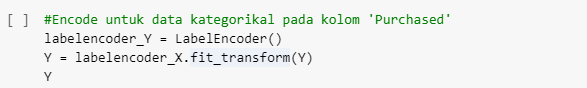

In [22]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_X.fit_transform(Y)
Y

#Yes = []

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

## 4. Splitting Dataset

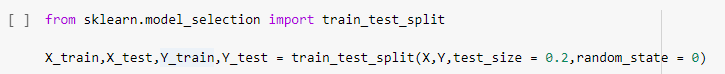

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)


In [24]:
# Print the shape of the dataset
print ('X_train:', (str(X_train.shape)))
print ('----------------')
print ('X_test:', (str(X_test.shape)))
print ('----------------')
print ('Y_train:', (str(Y_train.shape)))
print ('----------------')
print ('Y_test:', (str(Y_test.shape)))
print ('----------------')

X_train: (12, 3)
----------------
X_test: (3, 3)
----------------
Y_train: (12,)
----------------
Y_test: (3,)
----------------


## 5. Scale your Features
 

Dalam sebuah dataset, biasanya nilai pada tiap fitur mempunyai range yg berbeda. Hal ini dapat menjadikan masalah untuk
beberapa model machine learning. Untuk itu kita harus melakukan scaling agar semua nilai pada fitur memiliki range yang sama. Pada kasus ini kita menggunakan StandardScaler
      
      

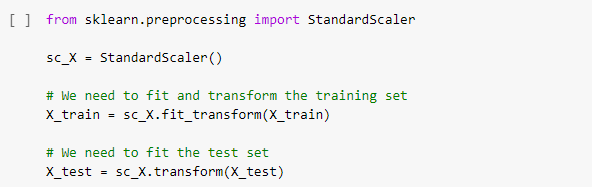

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [26]:
X_train

array([[ 0.00000000e+00,  1.13100526e+00,  8.68162753e-01],
       [ 1.41421356e+00, -7.99435932e-02, -1.31570762e+00],
       [-1.41421356e+00,  2.34195411e+00,  1.64811646e+00],
       [-1.41421356e+00, -3.00116112e-01,  7.12172013e-01],
       [ 0.00000000e+00,  9.10832742e-01,  3.61192846e-01],
       [ 1.41421356e+00, -1.40097871e+00, -1.39370299e+00],
       [ 0.00000000e+00, -1.31055071e-03,  1.66204420e-01],
       [-1.41421356e+00, -9.60633669e-01, -1.00372614e+00],
       [ 1.41421356e+00, -5.20288631e-01, -3.43551036e-02],
       [ 0.00000000e+00,  3.01426663e-02,  1.41413035e+00],
       [ 0.00000000e+00, -1.07071993e+00, -1.00372614e+00],
       [ 0.00000000e+00, -7.99435932e-02, -4.18760858e-01]])

In [27]:
X_test

array([[ 1.41421356, -1.29089245, -1.19871456],
       [ 1.41421356, -0.63037489, -0.61374928],
       [-1.41421356,  1.90160908,  1.29713729]])

Nah Sekarang semua data dalam fitur sudah berada dalam range yg sama, data ini bisa lgsg kita masukan kedalam model machine learning.

Dalam percobaan kali ini kita akan mencoba memasukkan data kedalam model KNN

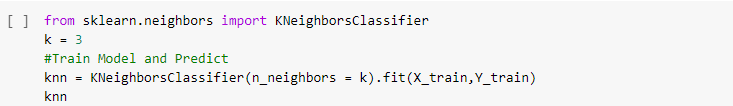

In [28]:
from sklearn.neighbors import KNeighborsClassifier
k =3
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_predict = knn.predict(X_test)

In [30]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predict))

Test set Accuracy:  0.6666666666666666


Dalam hal ini kita hanya mendapat akurasi 67%, ini terhitung kecil. ini bisa disebabkan karena data yg kita punya hanyaa sedikit. 